In this notebook, we demonstrated using the interactivity provided by matplotlib, jupyter, and the matplotlib event system. 
We reuse the charts from the [animation](N2_animated_solution.ipynb) notebook for the sake of time. 

In [1]:
# import matplotlib for viz and pandas for loading data
%matplotlib widget 

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/penguins.csv").dropna()
cat_for_color = df['island'].astype('category')
cats = {c:i for i, c in enumerate(cat_for_color.cat.categories)}
# overcomplicating but this is how we can get the colors we were using in the other examples
import matplotlib as mpl
import matplotlib.colors as mcolors
cmap = mpl.colormaps['viridis']
norm = mcolors.Normalize(cat_for_color.cat.codes.min(), cat_for_color.cat.codes.max())

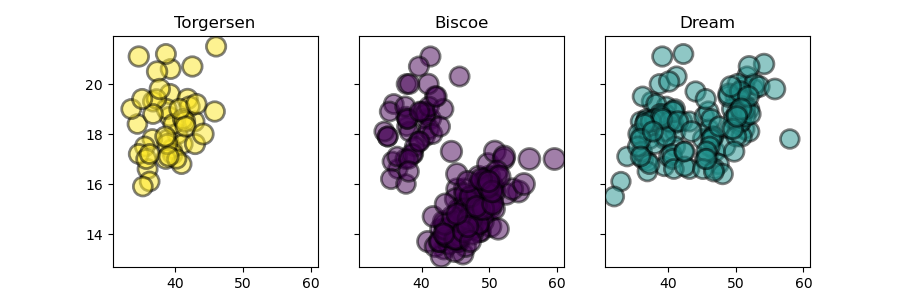

In [3]:
fig, axd = plt.subplot_mosaic([df['island'].unique()], sharex=True, sharey=True, figsize=(9,3))

for g, gdf in df.groupby('island'):
    axd[g].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', alpha=.5, color=cmap(norm(cats[g])), ec='k', linewidth=2, data=gdf)
    axd[g].set_title(g)

interactive(children=(Dropdown(description='frame', options=(0, 1, 2, 4, 5, 6, 7, 12, 13, 14, 15, 16, 17, 18, …

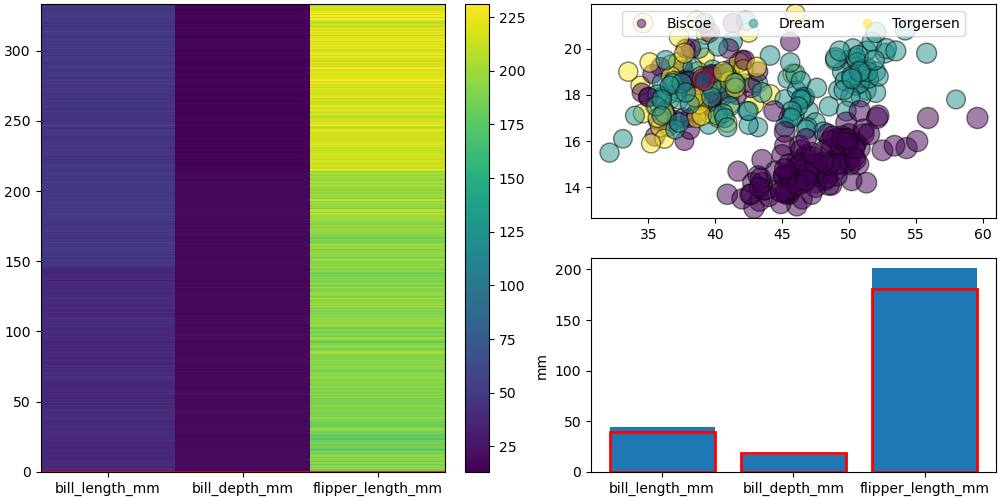

In [9]:
# we can use widgets to easily change an animation to an interaction https://ipywidgets.readthedocs.io/en/latest/index.html
from ipywidgets import interact

fig, axd = plt.subplot_mosaic([['heatmap', 'scatter'],['heatmap', 'bar']], layout='constrained', figsize=(10,5))

dfquant = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

### all code from above
im = axd['heatmap'].pcolormesh(df[dfquant])
cax = fig.colorbar(im)
axd['heatmap'].set_xticks([.5, 1.5, 2.5])
axd['heatmap'].set_xticklabels(dfquant)

# lets encode all the things! let's also play w/ this

cat_for_color = df['island'].astype('category')
sc = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cat_for_color.cat.codes, alpha=.5, ec='k', data =df)
handles, labels = sc.legend_elements()
# https://matplotlib.org/stable/users/explain/axes/legend_guide.html
axd['scatter'].legend(handles, cat_for_color.cat.categories, ncol=3, loc='upper center')

# lets add a bar chart

axd['bar'].bar(dfquant, df[dfquant].mean())
axd['bar'].set_ylabel("mm")


#lets make the first objects that we'll update
h = axd['heatmap'].axhline(0, color='red', alpha=.75)
s = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cats[df['island'][0]], alpha=.5, ec='r', linewidth=2, data=df.iloc[0])
b = axd['bar'].bar(dfquant, df[dfquant].iloc[0], color='none', ec='r', lw=2)

@interact(frame=df.index)
def update(frame):
    h.set_ydata([frame])
    s.set_offsets((df['bill_length_mm'].iloc[frame], df['bill_depth_mm'].iloc[frame]))
    s.set_sizes([df['flipper_length_mm'].iloc[frame]])
    s.set_facecolor(s.cmap(s.norm(cats[df['island'][frame]]))) # have to convert the value into the color it expects
    [bi.set_height(x) for bi, x in zip(b, df[dfquant].iloc[frame])] #update each bar independently
    return h, s, b

plt.show()

16

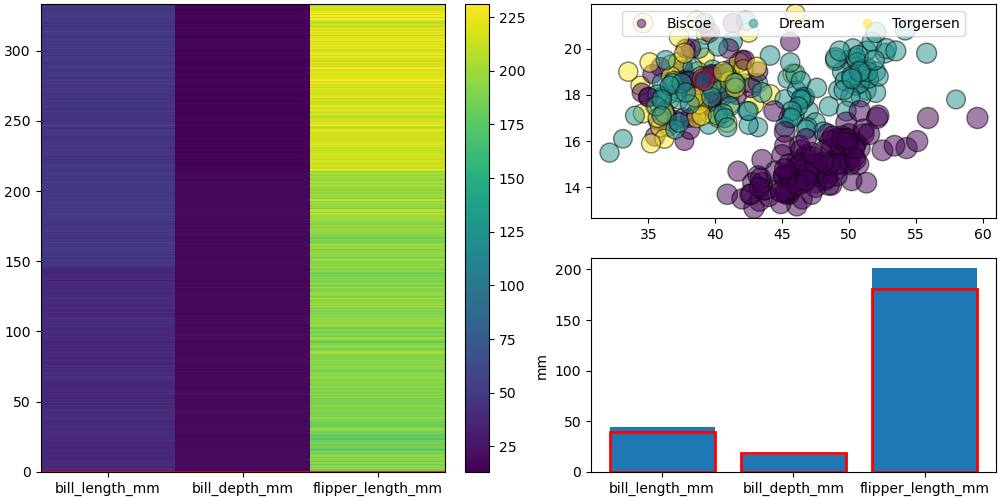

In [23]:
# What if I want to click things? Events! https://matplotlib.org/stable/users/explain/figure/event_handling.html
fig, axd = plt.subplot_mosaic([['heatmap', 'scatter'],['heatmap', 'bar']], layout='constrained', figsize=(10,5))

dfquant = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

### all code from above
im = axd['heatmap'].pcolormesh(df[dfquant], picker=True)
cax = fig.colorbar(im)
axd['heatmap'].set_xticks([.5, 1.5, 2.5])
axd['heatmap'].set_xticklabels(dfquant)

# lets encode all the things! let's also play w/ this

cat_for_color = df['island'].astype('category')
sc = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm',
                            c=cat_for_color.cat.codes, alpha=.5, ec='k', data =df, picker=True)
handles, labels = sc.legend_elements()
# https://matplotlib.org/stable/users/explain/axes/legend_guide.html
axd['scatter'].legend(handles, cat_for_color.cat.categories, ncol=3, loc='upper center')

# lets add a bar chart

axd['bar'].bar(dfquant, df[dfquant].mean())
axd['bar'].set_ylabel("mm")


#lets make the first objects that we'll update
h = axd['heatmap'].axhline(0, color='red', alpha=.75)
s = axd['scatter'].scatter('bill_length_mm', 'bill_depth_mm', s='flipper_length_mm', c=cats[df['island'][0]], alpha=.5, ec='r', linewidth=2, data=df.iloc[0])
b = axd['bar'].bar(dfquant, df[dfquant].iloc[0], color='none', ec='r', lw=2)

def update(frame):
    h.set_ydata([frame])
    s.set_offsets((df['bill_length_mm'].iloc[frame], df['bill_depth_mm'].iloc[frame]))
    s.set_sizes([df['flipper_length_mm'].iloc[frame]])
    s.set_facecolor(s.cmap(s.norm(cats[df['island'][frame]]))) # have to convert the value into the color it expects
    [bi.set_height(x) for bi, x in zip(b, df[dfquant].iloc[frame])] #update each bar independently
    return h, s, b
    
def onpick(event):
    #capture picking either the scatter point or line in the heatmap
    if event.artist is h:
        frame = int(event.ydata)
    elif event.artist is s:
        frame = event.ind
    else:
        frame=None
    print(f"frame: {frame}")
    return

def on_click(event):
    if event.inaxes:
        event.inaxes.patch.set_facecolor('grey')
    event.canvas.draw()
    return
    

fig.canvas.mpl_connect('pick_event', onpick)
fig.canvas.mpl_connect('button_press_event', on_click)